In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

In [3]:
user="root"
password="mysql"
host="localhost"
database="data"

In [4]:
connection=mysql.connector.connect(user=user, password=password, host=host, database=database)

In [5]:
query="SELECT * FROM Student_Performance;"
data= pd.read_sql(query, connection)

In [6]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [8]:
data.shape

(10000, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [10]:
data.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [11]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<AxesSubplot:>

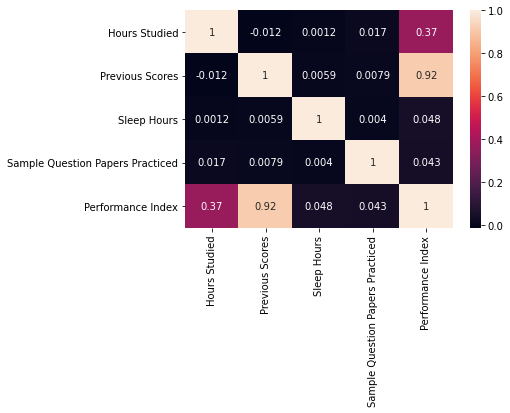

In [12]:
correlation=data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True)

In [13]:
data.replace({'Extracurricular Activities':{'Yes':1,'No':0}},inplace=True)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<AxesSubplot:>

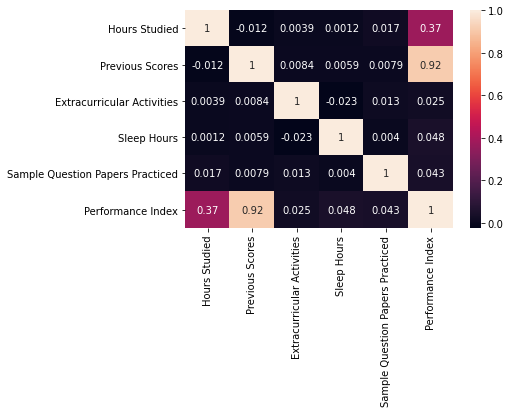

In [14]:
correlation=data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True)

In [15]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [16]:
X= data.drop(['Extracurricular Activities','Performance Index'],axis=1)
Y= data['Performance Index']
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [17]:
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [20]:
model=LinearRegression()

In [21]:
model.fit(X_train, Y_train)

LinearRegression()

In [22]:
#predict with the training data
pred_train= model.predict(X_train)

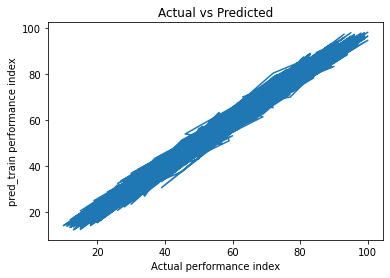

In [23]:
plt.plot(Y_train,pred_train)
plt.xlabel("Actual performance index")
plt.ylabel("pred_train performance index")
plt.title("Actual vs Predicted")
plt.show()

In [24]:
#prediction on test data
pred_data_test= model.predict(X_test)

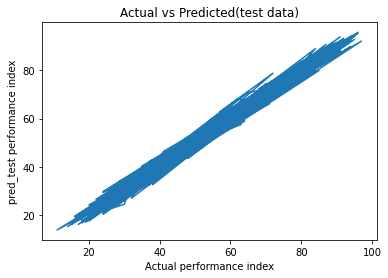

In [25]:
plt.plot(Y_test,pred_data_test)
plt.xlabel("Actual performance index")
plt.ylabel("pred_test performance index")
plt.title("Actual vs Predicted(test data)")
plt.show()

In [26]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
4335,1,58,5,1
5243,1,56,6,4
5633,5,73,7,4
496,9,96,5,9
7545,1,83,9,0
...,...,...,...,...
416,3,83,4,2
7656,2,89,9,4
6032,7,47,7,5
4402,2,54,4,1


In [27]:
test_data=pd.DataFrame(X_train)
test_data.to_csv('test_data.csv')
pred=pd.DataFrame(pred_data_test)
pred.to_csv('predictions.csv')

In [28]:
model.coef_

array([2.85336522, 1.01904473, 0.47801442, 0.19467972])

In [29]:
model.intercept_

-33.800326148429725

In [30]:
model.predict([[6,47,4,2]])

array([33.51638478])

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, pred_data_test)

# Calculating R-squared
r_squared = r2_score(Y_test, pred_data_test)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 4.121198475720095
R-squared: 0.9884414855818653
